# Imports

In [8]:

# import a library with an alias
import pandas as pd

# import a module from a package
from matplotlib import pyplot as plt


import seaborn as sns

In [9]:


# File paths - Update these with your actual file locations
SHARE_PRICES_FILE = "data/simfin_data/us-shareprices-daily.csv"
COMPANY_INFO_FILE = "data/simfin_data/us-companies.csv"

# Load Share Prices Data
df_share_prices = pd.read_csv(SHARE_PRICES_FILE, delimiter=';', parse_dates=['Date'])
print("✅ Share Prices Data Loaded. Shape:", df_share_prices.shape)

# Load Company Info Data
df_company = pd.read_csv(COMPANY_INFO_FILE, delimiter=';')
print("✅ Company Info Data Loaded. Shape:", df_company.shape)


✅ Share Prices Data Loaded. Shape: (5766996, 11)
✅ Company Info Data Loaded. Shape: (6067, 11)


In [10]:
df_share_prices.head()

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
0,A,45846,2019-03-27,80.50,80.77,78.89,79.00,75.72,1446133,NaN,317515869.0
1,A,45846,2019-03-28,79.39,79.79,78.71,79.70,76.39,1615615,NaN,317515869.0
2,A,45846,2019-03-29,80.16,80.67,79.95,80.38,77.04,1585137,NaN,317515869.0
3,A,45846,2019-04-01,80.96,81.77,80.96,81.56,78.33,1522681,0.16,317515869.0
4,A,45846,2019-04-02,81.71,81.76,81.03,81.14,77.93,1203037,NaN,317515869.0


In [11]:
df_company.head()

,Ticker,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency
0,NaN,17162642,NaN,NaN,NaN,NaN,NaN,NaN,us,1913577.0,USD
1,NaN,17429327,NaN,NaN,NaN,NaN,NaN,NaN,us,1894951.0,USD
2,NaN,17590527,NaN,NaN,NaN,NaN,NaN,NaN,us,1847355.0,USD
3,NaN,17590533,NaN,NaN,NaN,NaN,NaN,NaN,us,1856161.0,USD
4,NaN,17596599,NaN,NaN,NaN,NaN,NaN,NaN,us,1862463.0,USD


# 2. Data transformation

## 2.1 Handiling columns name convention

In [12]:
# Example transformations:
df_share_prices.columns = [col.strip().lower().replace(" ", "_") for col in df_share_prices.columns]  # Normalize column names
# Example transformations:
df_company.columns = [col.strip().lower().replace(" ", "_") for col in df_company.columns]  # Normalize column names

In [13]:
df_share_prices['date'] = pd.to_datetime(df_share_prices['date'])  # Convert date columns


In [14]:
df_share_prices.head()


,ticker,simfinid,date,open,high,low,close,adj._close,volume,dividend,shares_outstanding
0,A,45846,2019-03-27,80.50,80.77,78.89,79.00,75.72,1446133,NaN,317515869.0
1,A,45846,2019-03-28,79.39,79.79,78.71,79.70,76.39,1615615,NaN,317515869.0
2,A,45846,2019-03-29,80.16,80.67,79.95,80.38,77.04,1585137,NaN,317515869.0
3,A,45846,2019-04-01,80.96,81.77,80.96,81.56,78.33,1522681,0.16,317515869.0
4,A,45846,2019-04-02,81.71,81.76,81.03,81.14,77.93,1203037,NaN,317515869.0


In [15]:
df_company.head()

,ticker,simfinid,company_name,industryid,isin,end_of_financial_year_(month),number_employees,business_summary,market,cik,main_currency
0,NaN,17162642,NaN,NaN,NaN,NaN,NaN,NaN,us,1913577.0,USD
1,NaN,17429327,NaN,NaN,NaN,NaN,NaN,NaN,us,1894951.0,USD
2,NaN,17590527,NaN,NaN,NaN,NaN,NaN,NaN,us,1847355.0,USD
3,NaN,17590533,NaN,NaN,NaN,NaN,NaN,NaN,us,1856161.0,USD
4,NaN,17596599,NaN,NaN,NaN,NaN,NaN,NaN,us,1862463.0,USD


## 2.2 Checking for null values

### 2.2.1 Share prices

ticker                      0
simfinid                    0
date                        0
open                        0
high                        0
low                         0
close                       0
adj._close                  0
volume                      0
dividend              5732034
shares_outstanding     516269
dtype: int64


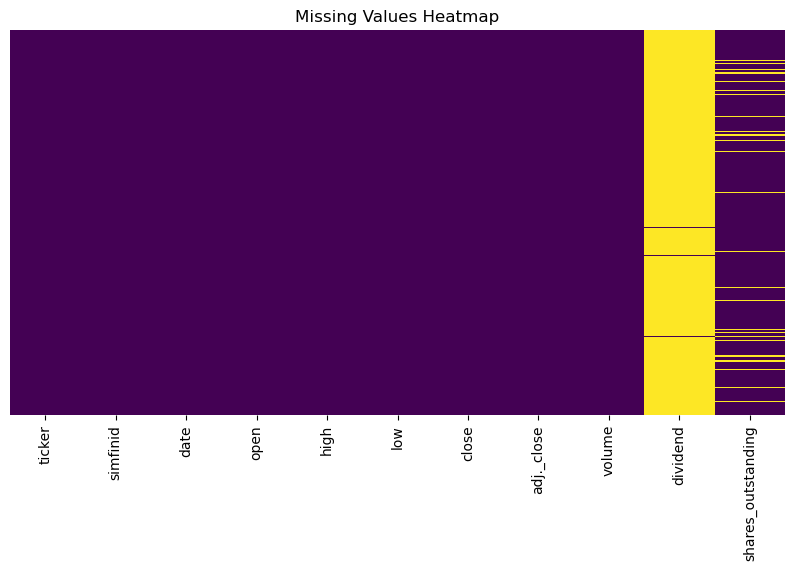

In [16]:
# Check for missing values
print(df_share_prices.isnull().sum())  # Count of nulls per column


plt.figure(figsize=(10,5))
sns.heatmap(df_share_prices.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [17]:
# Calculate percentage of missing values per column
null_percentage = (df_share_prices.isnull().sum() / len(df_share_prices)) * 100

# Display the result
print(null_percentage)

ticker                 0.000000
simfinid               0.000000
date                   0.000000
open                   0.000000
high                   0.000000
low                    0.000000
close                  0.000000
adj._close             0.000000
volume                 0.000000
dividend              99.393757
shares_outstanding     8.952130
dtype: float64


#### 2.2.1.1 Handle missing values

In [18]:
# Cleaning Share Prices Data
def clean_share_prices(df):
    df = df.copy()  # Avoid chained assignment warnings
    df = df.drop(columns=['dividend'], errors='ignore')  # Drop the dividend column
    df = df.assign(
        shares_outstanding=df['shares_outstanding'].ffill()  # Forward fill missing shares outstanding
    )
    df = df.sort_values(by=['ticker', 'date'])
    return df


# Apply Cleaning Functions
df_share_prices_cleaned = clean_share_prices(df_share_prices)


# Check Results
print("✅ Share Prices Cleaned. Shape:", df_share_prices_cleaned.shape)

print("🔍 Missing Values in Share Prices:\n", df_share_prices_cleaned.isnull().sum())


✅ Share Prices Cleaned. Shape: (5766996, 10)
🔍 Missing Values in Share Prices:
 ticker                0
simfinid              0
date                  0
open                  0
high                  0
low                   0
close                 0
adj._close            0
volume                0
shares_outstanding    0
dtype: int64


### 2.2.1 Companies

ticker                             76
simfinid                            0
company_name                       74
industryid                        286
isin                             1082
end_of_financial_year_(month)      73
number_employees                  753
business_summary                  312
market                              0
cik                                12
main_currency                       0
dtype: int64


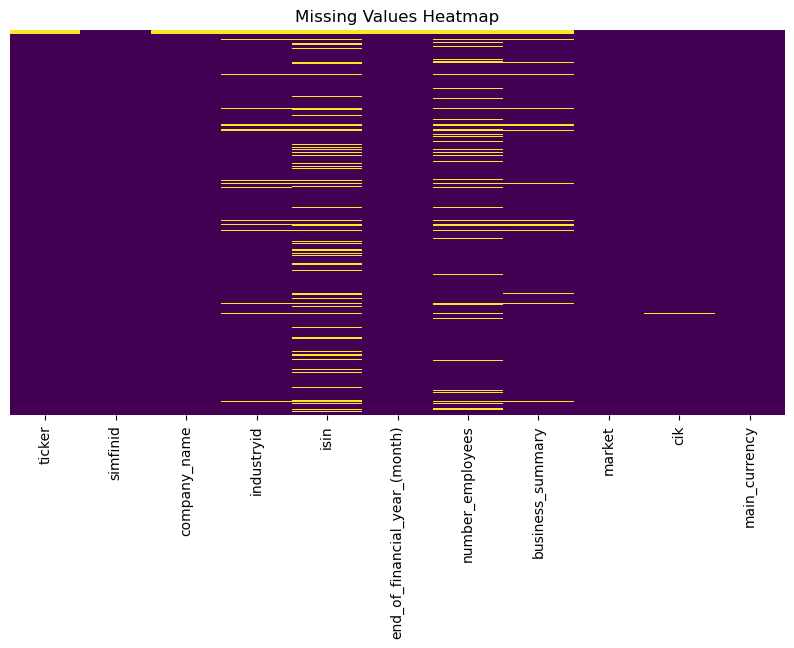

In [19]:
# Check for missing values
print(df_company.isnull().sum())  # Count of nulls per column


plt.figure(figsize=(10,5))
sns.heatmap(df_company.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [20]:
# Calculate percentage of missing values per column
null_percentage = (df_company.isnull().sum() / len(df_company)) * 100

# Display the result
print(null_percentage)

ticker                            1.252678
simfinid                          0.000000
company_name                      1.219713
industryid                        4.714027
isin                             17.834185
end_of_financial_year_(month)     1.203231
number_employees                 12.411406
business_summary                  5.142575
market                            0.000000
cik                               0.197791
main_currency                     0.000000
dtype: float64


In [21]:
# Cleaning Company Info Data
def clean_company_info(df):
    df = df.copy()  # Avoid chained assignment warnings
    
    # Drop rows where ticker is missing (since we need it for merging)
    df = df.dropna(subset=['ticker'])
    
    # Fill missing values
    df = df.assign(
        company_name=df['company_name'].fillna('Unknown'),
        industryid=df['industryid'].fillna(-1).astype('category'),  # Fill with -1 and convert to category
        end_of_financial_year_month=df['end_of_financial_year_(month)'].fillna(df['end_of_financial_year_(month)'].mode()[0]),  # Fill with most frequent value
        number_employees=df['number_employees'].fillna(df['number_employees'].median()),  # Fill missing with median
        business_summary=df['business_summary'].fillna('No summary available')
    )
    
    return df

# Apply Cleaning Function
df_company_cleaned = clean_company_info(df_company)

# Check Missing Values Again
print("✅ Company Info Cleaned. Shape:", df_company_cleaned.shape)
print("🔍 Missing Values in Company Info:\n", df_company_cleaned.isnull().sum())


✅ Company Info Cleaned. Shape: (5991, 12)
🔍 Missing Values in Company Info:
 ticker                              0
simfinid                            0
company_name                        0
industryid                          0
isin                             1006
end_of_financial_year_(month)       0
number_employees                    0
business_summary                    0
market                              0
cik                                11
main_currency                       0
end_of_financial_year_month         0
dtype: int64


In [22]:
df_share_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5766996 entries, 0 to 5766995
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ticker              object        
 1   simfinid            int64         
 2   date                datetime64[ns]
 3   open                float64       
 4   high                float64       
 5   low                 float64       
 6   close               float64       
 7   adj._close          float64       
 8   volume              int64         
 9   dividend            float64       
 10  shares_outstanding  float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 484.0+ MB


In [23]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6067 entries, 0 to 6066
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ticker                         5991 non-null   object 
 1   simfinid                       6067 non-null   int64  
 2   company_name                   5993 non-null   object 
 3   industryid                     5781 non-null   float64
 4   isin                           4985 non-null   object 
 5   end_of_financial_year_(month)  5994 non-null   float64
 6   number_employees               5314 non-null   float64
 7   business_summary               5755 non-null   object 
 8   market                         6067 non-null   object 
 9   cik                            6055 non-null   float64
 10  main_currency                  6067 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 521.5+ KB


# 3. Merging

In [24]:
# Merging Share Prices with Company Info
def merge_datasets(share_prices, company_info):
    merged_df = share_prices.merge(company_info, on='ticker', how='left')
    return merged_df

# Apply Merge
df_merged = merge_datasets(df_share_prices_cleaned, df_company_cleaned)

# Check Results
print("✅ Merged Data Shape:", df_merged.shape)
print("🔍 Missing Values After Merge:\n", df_merged.isnull().sum())


✅ Merged Data Shape: (5766996, 21)
🔍 Missing Values After Merge:
 ticker                                0
simfinid_x                            0
date                                  0
open                                  0
high                                  0
low                                   0
close                                 0
adj._close                            0
volume                                0
shares_outstanding                    0
simfinid_y                            0
company_name                          0
industryid                            0
isin                             410811
end_of_financial_year_(month)         0
number_employees                      0
business_summary                      0
market                                0
cik                                6654
main_currency                         0
end_of_financial_year_month           0
dtype: int64


In [25]:
df_merged

,ticker,simfinid_x,date,open,high,low,close,adj._close,volume,shares_outstanding,...,company_name,industryid,isin,end_of_financial_year_(month),number_employees,business_summary,market,cik,main_currency,end_of_financial_year_month
0,A,45846,2019-03-27,80.50,80.77,78.89,79.00,75.72,1446133,317515869.0,...,AGILENT TECHNOLOGIES INC,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD,10.0
1,A,45846,2019-03-28,79.39,79.79,78.71,79.70,76.39,1615615,317515869.0,...,AGILENT TECHNOLOGIES INC,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD,10.0
2,A,45846,2019-03-29,80.16,80.67,79.95,80.38,77.04,1585137,317515869.0,...,AGILENT TECHNOLOGIES INC,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD,10.0
3,A,45846,2019-04-01,80.96,81.77,80.96,81.56,78.33,1522681,317515869.0,...,AGILENT TECHNOLOGIES INC,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD,10.0
4,A,45846,2019-04-02,81.71,81.76,81.03,81.14,77.93,1203037,317515869.0,...,AGILENT TECHNOLOGIES INC,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766991,ZYXI,171401,2024-02-22,12.75,12.96,12.66,12.89,12.89,99612,36435000.0,...,ZYNEX INC,106004.0,US98986M1036,12.0,768.0,"Zynex, Inc. engages in the design, manufacture...",us,846475.0,USD,12.0
5766992,ZYXI,171401,2024-02-23,12.89,13.03,12.83,12.91,12.91,155386,36435000.0,...,ZYNEX INC,106004.0,US98986M1036,12.0,768.0,"Zynex, Inc. engages in the design, manufacture...",us,846475.0,USD,12.0
5766993,ZYXI,171401,2024-02-26,13.04,13.04,12.67,12.82,12.82,335055,36435000.0,...,ZYNEX INC,106004.0,US98986M1036,12.0,768.0,"Zynex, Inc. engages in the design, manufacture...",us,846475.0,USD,12.0
5766994,ZYXI,171401,2024-02-27,12.83,13.77,12.83,13.74,13.74,395525,36435000.0,...,ZYNEX INC,106004.0,US98986M1036,12.0,768.0,"Zynex, Inc. engages in the design, manufacture...",us,846475.0,USD,12.0


## 3.1 Final clean up

In [26]:
print(df_merged.columns)


Index(['ticker', 'simfinid_x', 'date', 'open', 'high', 'low', 'close',
       'adj._close', 'volume', 'shares_outstanding', 'simfinid_y',
       'company_name', 'industryid', 'isin', 'end_of_financial_year_(month)',
       'number_employees', 'business_summary', 'market', 'cik',
       'main_currency', 'end_of_financial_year_month'],
      dtype='object')


In [27]:
# Drop redundant 'simfinid_y' column (keeping 'simfinid_x' as 'simfinid')
df_merged = df_merged.drop(columns=['simfinid_y']).rename(columns={'simfinid_x': 'simfinid'})



In [28]:
# Save the processed dataset
output_path = "processed_data"
df_merged.to_csv(f"{output_path}.csv", index=False)
df_merged.to_parquet(f"{output_path}.parquet")

# Check final structure
print("✅ Final Processed Data Shape:", df_merged.shape)
print("🔍 Missing Values in Final Data:\n", df_merged.isnull().sum())
print("📂 Data saved successfully as CSV and Parquet!")


✅ Final Processed Data Shape: (5766996, 20)
🔍 Missing Values in Final Data:
 ticker                                0
simfinid                              0
date                                  0
open                                  0
high                                  0
low                                   0
close                                 0
adj._close                            0
volume                                0
shares_outstanding                    0
company_name                          0
industryid                            0
isin                             410811
end_of_financial_year_(month)         0
number_employees                      0
business_summary                      0
market                                0
cik                                6654
main_currency                         0
end_of_financial_year_month           0
dtype: int64
📂 Data saved successfully as CSV and Parquet!


# 4. Preparing the Model Table Data

In [29]:
def prepare_company_data(df, ticker):
    """
    Prepare model data for a specific company based on its ticker.
    """
    df_company = df[df['ticker'] == ticker].copy()  # Filter for selected company
    
    # Ensure data is sorted correctly
    df_company = df_company.sort_values(by='date')

    # Creating lag features (last 3 days closing prices)
    df_company['close_t-1'] = df_company['close'].shift(1)
    df_company['close_t-2'] = df_company['close'].shift(2)
    df_company['close_t-3'] = df_company['close'].shift(3)

    # Target Variable: Next day's price movement (1 if up, 0 if down)
    df_company['target'] = (df_company['close'].shift(-1) > df_company['close']).astype(int)

    # Drop NaN values caused by shifting
    df_company.dropna(inplace=True)

    return df_company[['date', 'close_t-3', 'close_t-2', 'close_t-1', 'target']]

# Specify a company ticker
selected_ticker = "AAPL"  # Change this to test different companies

# Apply the function
df_company_model = prepare_company_data(df_merged, selected_ticker)

# Check the processed data
print(f"✅ Data Prepared for {selected_ticker}. Shape:", df_company_model.shape)
print("🔍 Sample Data:\n", df_company_model.head())



✅ Data Prepared for AAPL. Shape: (1237, 5)
🔍 Sample Data:
             date  close_t-3  close_t-2  close_t-1  target
14262 2019-04-01      47.12      47.18      47.49       1
14263 2019-04-02      47.18      47.49      47.81       1
14264 2019-04-03      47.49      47.81      48.51       1
14265 2019-04-04      47.81      48.51      48.84       1
14266 2019-04-05      48.51      48.84      48.92       1


# 5. Traing the model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# ✅ Ensure Data is Numeric (Fixing Categorical Columns)
def prepare_xgboost_data(df):
    """
    Ensure the dataset is numeric by dropping text columns and encoding categorical features.
    """
    # Drop non-numeric columns that don't contribute to the model
    cols_to_drop = ['ticker', 'company_name', 'isin', 'business_summary', 'market', 'main_currency']
    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

    # Convert categorical columns to numeric (if needed)
    if 'industryid' in df.columns:
        df['industryid'] = df['industryid'].astype('category').cat.codes  # Convert to numeric codes

    return df

# Apply the fix before training
df_company_model_fixed = prepare_xgboost_data(df_company_model)

print("✅ Data Preparation Complete. Shape:", df_company_model_fixed.shape)


✅ Data Preparation Complete. Shape: (1237, 5)


In [2]:


# Set SimFin API Key (Replace with your actual key)
sf.set_api_key('344dd533-861f-4bef-9f52-be02f0276014')

# Set SimFin Data Directory (for caching data)
sf.set_data_dir('simfin_data')

def get_latest_stock_data(ticker):
    """
    Fetch the latest available stock data (Close Price, Volume, etc.) from SimFin.
    """
    try:
        # Fetch daily stock price data
        df = sf.load_shareprices(variant='daily', market='us')

        # Ensure 'Ticker' exists in the index
        if ticker not in df.index.get_level_values(0):
            print(f"❌ No data found for ticker: {ticker}")
            return None

        # Select only the specified ticker using index filtering
        df_ticker = df.loc[ticker].copy()

        # Get the latest row
        latest_row = df_ticker.iloc[-1]  

        # Extract required features
        latest_data = {
            'close_t-1': df_ticker['Close'].shift(1).iloc[-1],
            'close_t-2': df_ticker['Close'].shift(2).iloc[-1],
            'close_t-3': df_ticker['Close'].shift(3).iloc[-1],
            'close_t-4': df_ticker['Close'].shift(4).iloc[-1],
            'close_t-5': df_ticker['Close'].shift(5).iloc[-1],
            'vol_ma_5': df_ticker['Volume'].rolling(window=5).mean().iloc[-1],
            'vol_ma_10': df_ticker['Volume'].rolling(window=10).mean().iloc[-1],
            'day_of_week': latest_row.name.dayofweek,  # Monday=0, Sunday=6
            'month': latest_row.name.month
        }

        # Convert to DataFrame (for prediction)
        latest_df = pd.DataFrame([latest_data])

        print("✅ Latest Stock Data Fetched from SimFin!")
        return latest_df

    except Exception as e:
        print(f"❌ Error Fetching Data from SimFin: {e}")
        return None

# Test with a known stock symbol
get_latest_stock_data("A")




ModuleNotFoundError: No module named 'simfin'

In [ ]:
def train_xgboost_final(df_company_model):
    """
    Train an optimized XGBoost model using RandomizedSearchCV for better accuracy.
    """
    # Ensure 'target' column exists
    if 'target' not in df_company_model.columns:
        print("❌ Error: 'target' column is missing. Recalculating it now.")
        df_company_model['target'] = (df_company_model['close'].shift(-1) > df_company_model['close']).astype(int)

    # Splitting Features (X) and Target (y)
    cols_to_drop = ['date', 'close', 'target']
    cols_to_drop = [col for col in cols_to_drop if col in df_company_model.columns]  # Drop only if they exist

    X = df_company_model.drop(columns=cols_to_drop)
    y = df_company_model['target']

    # Train-Test Split (80% Train, 20% Test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Define XGBoost Model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # Final Optimized Hyperparameters
    param_dist = {
        'n_estimators': [200, 300, 400],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 5],
        'min_child_weight': [1, 3],
        'gamma': [0, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.6, 0.8],
        'scale_pos_weight': [1.2, 1.5]  # Adjusting for class imbalance
    }

    # Perform Randomized Search
    rand_search = RandomizedSearchCV(
        model, param_distributions=param_dist, n_iter=15,
        scoring='accuracy', cv=3, n_jobs=-1, random_state=42
    )

    rand_search.fit(X_train, y_train)

    # Best Model
    best_model = rand_search.best_estimator_

    # Make Predictions
    y_pred = best_model.predict(X_test)

    # Evaluate Performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("✅ Final XGBoost Model Training Complete!")
    print(f"📊 Best Hyperparameters: {rand_search.best_params_}")
    print(f"📊 Final Optimized Accuracy: {accuracy:.4f}")
    print("\n🔍 Classification Report:\n", report)

    return best_model

# Train the final optimized model
xgb_model_final = train_xgboost_final(df_company_model_fixed)


In [ ]:
import joblib

# Save the model as a binary file
joblib.dump(xgb_model_final, "xgb_model_final.pkl")


print("✅ Model saved successfully!")


In [ ]:
# Print features used during model training
print("✅ Features Used in Training:", xgb_model_final.feature_names_in_)

# Fetch latest stock data
latest_data = get_latest_stock_data("AAPL")

# Print features from API data
print("✅ Features from SimFin API:", latest_data.columns if latest_data is not None else "No data fetched")


In [ ]:
def predict_next_day_xgboost_api(model, ticker):
    """
    Fetch latest stock data from SimFin and predict whether the stock will go up or down.
    """
    # Fetch latest stock data from SimFin API
    latest_data = get_latest_stock_data(ticker)

    if latest_data is None:
        print("❌ Could not retrieve latest stock data. Aborting prediction.")
        return

    # Ensure feature alignment: Keep only the features used in training
    model_features = model.feature_names_in_
    latest_data = latest_data[model_features]  # Select only relevant columns

    # Make Prediction
    prediction = model.predict(latest_data)
    prediction_label = "📈 Up" if prediction[0] == 1 else "📉 Down"

    print(f"🔮 XGBoost Prediction for {ticker}: {prediction_label}")

# Example Usage: Predict for AAPL
predict_next_day_xgboost_api(xgb_model_final, "AAPL")


## 5.1 Spliting testing and training

In [ ]:
import requests

class SimFinAPI:
    BASE_URL = "https://simfin.com/api/v2/companies/prices/list"
    API_KEY = "344dd533-861f-4bef-9f52-be02f0276014"  # Replace with your actual SimFin API key

    def __init__(self):
        """Initialize API wrapper with headers."""
        self.headers = {
            "Authorization": f"api-key {self.API_KEY}"
        }

    def get_latest_stock_data(self, ticker):
        """
        Fetch the latest available stock data (Close Price, Volume, etc.) from SimFin.
        """
        try:
            # Define request parameters
            params = {
                "ticker": ticker,
                "timeframe": "daily",
                "start": "2024-01-01",  # Adjust as needed
                "end": "2024-12-31"
            }

            # Send API request
            response = requests.get(self.BASE_URL, headers=self.headers, params=params)

            # Print Full Response for Debugging
            print("🔍 Full API Response:", response.status_code, response.text)

            # Handle errors
            if response.status_code != 200:
                print(f"❌ Error Fetching Data: {response.json().get('error', 'Unknown error')}")
                return None

            # Parse JSON response
            data = response.json()

            print("✅ API Request Successful!")
            return data  # Return raw data for now

        except Exception as e:
            print(f"❌ Exception Fetching Data from SimFin: {e}")
            return None

# Initialize API Wrapper
simfin_api = SimFinAPI()

# Test with a known ticker (AAPL)
api_response = simfin_api.get_latest_stock_data("AAPL")
print("🔍 Raw API Response:", api_response)


🔍 Full API Response: 404 {"url":"/api/v2/companies/prices/list?end=2024-12-31&start=2024-01-01&ticker=AAPL&timeframe=daily","statusCode":404,"statusMessage":"Page not found: /api/v2/companies/prices/list?end=2024-12-31&start=2024-01-01&ticker=AAPL&timeframe=daily","message":"Page not found: /api/v2/companies/prices/list?end=2024-12-31&start=2024-01-01&ticker=AAPL&timeframe=daily","stack":""}
❌ Error Fetching Data: Unknown error
🔍 Raw API Response: None


In [ ]:
import requests

url = "https://backend.simfin.com/api/v3/companies/common-shares-outstanding?ticker=AAPL&start=2025-01-01"

headers = {
    "accept": "application/json",
    "Authorization": "api-key 344dd533-861f-4bef-9f52-be02f0276014"
}

response = requests.get(url, headers=headers)

print(response.text)

[{"pid":111052,"endDate":"2025-01-17","value":15022073000}]


In [5]:
import requests
import pandas as pd

# Set your API key
API_KEY = "344dd533-861f-4bef-9f52-be02f0276014"

# Define the endpoint (use company ID, not ticker)
company_id = 59265  # Example: Apple Inc.'s ID on SimFin
url = f"https://simfin.com/api/v2/companies/id/{company_id}/shares/prices"

# Define the parameters
params = {
    "api-key": API_KEY,
    "start": "2023-01-01",  # Replace with your desired start date
    "end": "2024-03-11",  # Replace with your desired end date
    "timeframe": "d"  # 'd' for daily, 'w' for weekly, 'm' for monthly
}

# Make the GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Convert response to JSON
    if 'data' in data:  # Ensure there is data in response
        df = pd.DataFrame(data['data'], columns=data['columns'])  # Convert to DataFrame
        print(df.head())  # Print the first few rows
    else:
        print("No data found in response.")
else:
    print("Error:", response.status_code, response.text)


Error: 404 {"url":"/api/v2/companies/id/59265/shares/prices?api-key=344dd533-861f-4bef-9f52-be02f0276014&end=2024-03-11&start=2023-01-01&timeframe=d","statusCode":404,"statusMessage":"Page not found: /api/v2/companies/id/59265/shares/prices?api-key=344dd533-861f-4bef-9f52-be02f0276014&end=2024-03-11&start=2023-01-01&timeframe=d","message":"Page not found: /api/v2/companies/id/59265/shares/prices?api-key=344dd533-861f-4bef-9f52-be02f0276014&end=2024-03-11&start=2023-01-01&timeframe=d","stack":""}


## 5.2 Standarize data

## 5.3 Training using logistic regresion model


## 5.4 Predict

## 5.5 Evaluation of model